# Scatter plots

A scatter plot draws all instances in the data on a coordinate system from two numeric columns. 

To be more intuitive, let us examine the scatter plot below. Here, the coordination is based on GPA as the vertical axis and Daily Study Time as the horizontal axis. Each dot in the plot represents one instance in the data. We can project any point onto the horizontal axis to get its Daily Study Time value, and the vertical axis to get its GPA value.

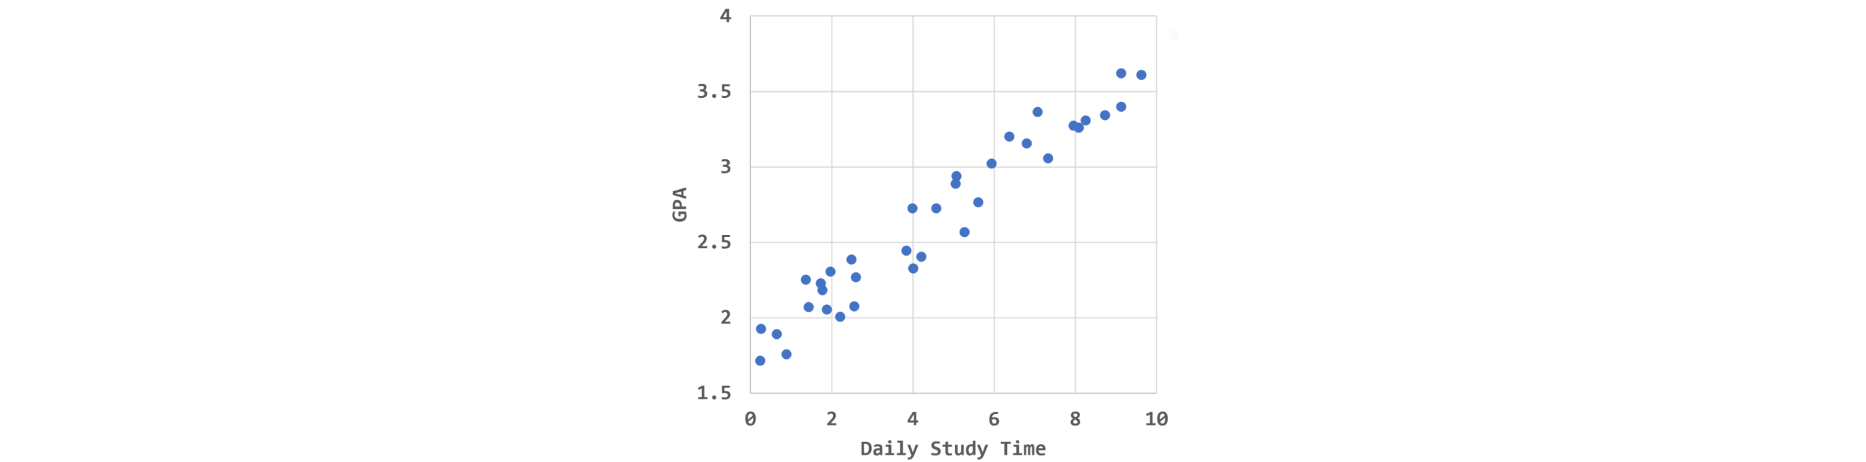

The pattern of the points in a scatter plot strongly describes the correlation of the two columns in the axes. Reading the patterns is quite easy
- Any clear patterns in the points like a line, a curve, a zig zag, etc., indicate some correlation. The more defined the patterns, the stronger the correlations.
- A bottom left corner to top right corner pattern means a positive correlation
- A top left corner to bottom right corner pattern means a negative correlation
- If the points all spread out and seems random, the correlation is very weak or not existing. This also include patterns that go top-down or left-right.

In the three plots below, in the order from left to right, we have, 1) a strong positive correlation, 2) a weak negative correlation, and 3) no correlations between the two columns.

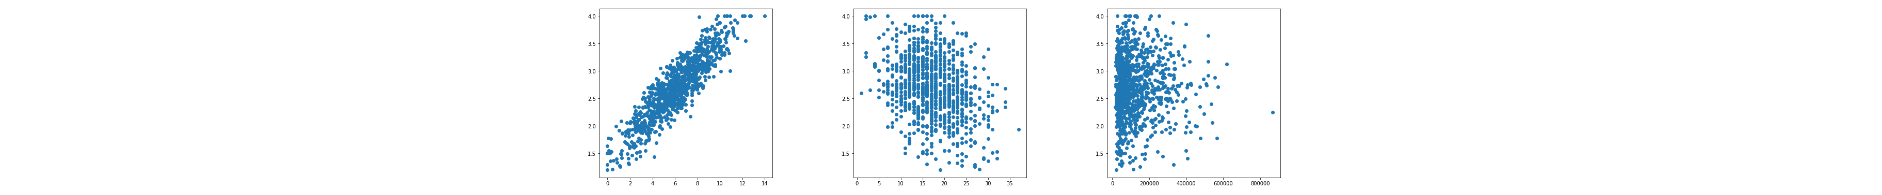

## Load data

We will use the auto-mpg data. The original version is at https://archive.ics.uci.edu/ml/datasets/auto+mpg. However, I did some minor modifications so we can focus on visualizing without having to worry about processing data.

In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('auto-mpg.csv')
data.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,1970,North America,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,1970,North America,buick skylark 320


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   year          398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


## Basic scatter plot

The most basic type of scatter plots only involves two columns and illustrates their correlation.

### In matplotlib

In matplotlib, we can use `pyplot.scatter()` to draw a scatter plot. At minimum, we need to provide the two arrays of interests which must have the same size. The first input (`x`) is the horizontal axis, and second (`y`) vertical.

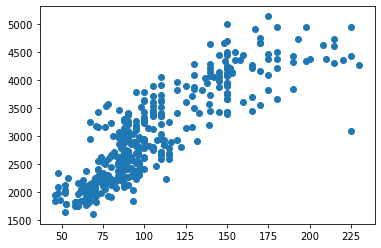

In [3]:
import matplotlib.pyplot as plt

plt.scatter(data['horsepower'], data['weight'])
plt.show()

There are a lot we can adjust in a scatter plot to improve presentations. Some options are
- `marker`: marker shape
- `s`: marker size
- `color`: marker color
- `linewidth`: marker edge thickness
- `edgecolor`: marker edge color

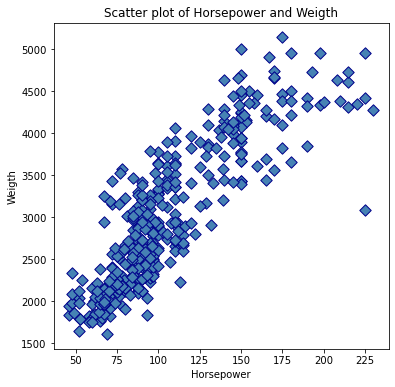

In [4]:
x='horsepower'
y='weight'

plt.figure(figsize=(6,6))
plt.scatter(
    x=data[x], 
    y=data[y],     
    marker='D',         
    s=65,               
    color='steelblue',  
    linewidth=1,        
    edgecolor='darkblue'
)
plt.xlabel('Horsepower')
plt.ylabel('Weigth')
plt.title('Scatter plot of Horsepower and Weigth')
plt.show()

### In pandas

In pandas, we call `plot.scatter()` from the dataframe and provide `x` and `y` as column names. 

Minimum usage is as follows

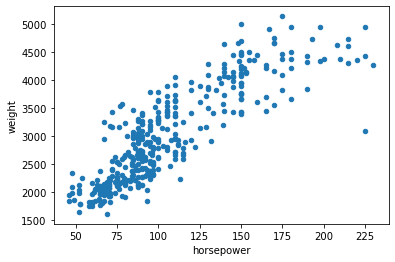

In [5]:
data.plot.scatter('horsepower', 'weight')
plt.show()

All other options like matplotlib are still available. I will add argument names to make the code more readable

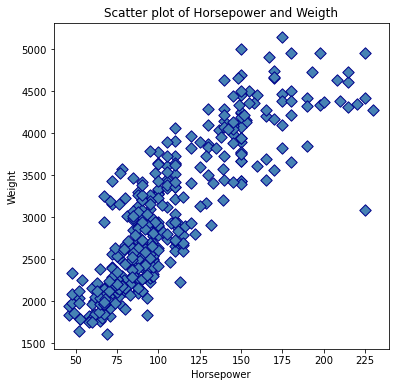

In [6]:
x='horsepower'
y='weight'

data.plot.scatter(
    x=x, 
    y=y,     
    marker='D',         
    s=65,               
    color='steelblue',  
    linewidth=1,        
    edgecolor='darkblue',
    xlabel='Horsepower',
    ylabel='Weight',
    title='Scatter plot of Horsepower and Weigth',
    figsize=(6,6)
)
plt.show()

### In seaborn

In seaborn, we use `scatterplot()`. Similarly, at minimum, we need to provide the two columns/arrays of interests

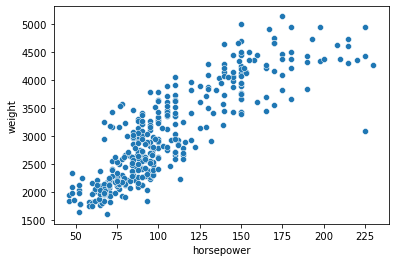

In [7]:
import seaborn as sn

sn.scatterplot(
    data,
    x='horsepower',
    y='weight'
)
plt.show()

Like the other two libraries, we can add more adjustments to improve presentation

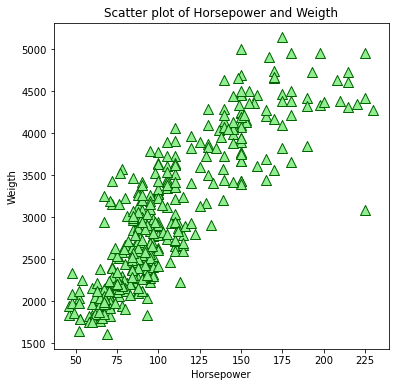

In [8]:
x='horsepower'
y='weight'

plt.figure(figsize=(6,6))
sn.scatterplot(
    data,
    x=x,
    y=y,
    s=100,
    marker='^',
    color='lightgreen',
    linewidth=1,
    edgecolor='darkgreen'
)
plt.xlabel('Horsepower')
plt.ylabel('Weigth')
plt.title('Scatter plot of Horsepower and Weigth')
plt.show()

# Adding more dimensions

The basic scatter plots only allow visualization of data in a two-dimensional basis system. However, there are a number of ways to add more data dimensions into a scatter plot
- Marker colors
- Marker shapes
- Marker sizes
- 3D plot

## Using marker colors

Marker colors can be utilized to indicate values of a third column which can be either categorical or numeric. 

### In matplotlib

Numeric stratified column will generate a gradient color. We simply use the column in `c=` argument and can further add a `colorbar()` legend for our plot. However, we need to manually add the colorbar title.

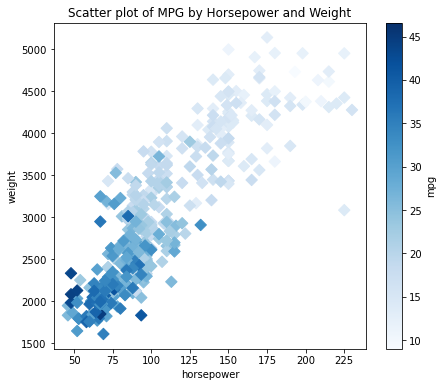

In [9]:
x = 'horsepower'
y = 'weight'
color_col = 'mpg'
title = 'Scatter plot of MPG by Horsepower and Weight'

#plot scatter
plt.figure(figsize=(7,6))
plt.scatter(
    x=data[x], 
    y=data[y],     
    marker='D',         
    s=65,               
    c=data[color_col],
    cmap='Blues'
)
#color bar
colorbar = plt.colorbar()
#color bar title
colorbar.ax.set_ylabel(color_col)
plt.xlabel(x)
plt.ylabel(y)
plt.title(title)
plt.show()

Stratifying colors by categorical data can be done similarly. However, we have to transform classes to numbers and manually draw the legends. I find it easier to use a loop to draw and superimpose a scatter plot for each class. Additionally, we may want to change the default colors in matplotlib as they can be hard to read

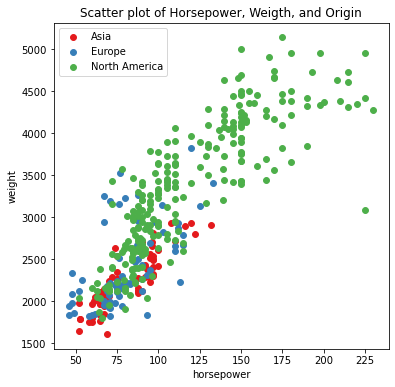

In [10]:
x = 'horsepower'
y = 'weight'
color_col = 'origin'
title = 'Scatter plot of Horsepower, Weigth, and Origin'

#change default color cycle
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set1.colors)
plt.figure(figsize=(6,6))

#loop through each category
for category in np.unique(data[color_col]):
    plt.scatter(
        data[x][data[color_col]==category], 
        data[y][data[color_col]==category],     
        label=category,
        marker='o',         
        s=35,
    )
plt.legend()
plt.xlabel(x)
plt.ylabel(y)
plt.title(title)
plt.show()

### In pandas

The continuous color column is easy enough with `c=`. In pandas, the colorbar will be automatically added.

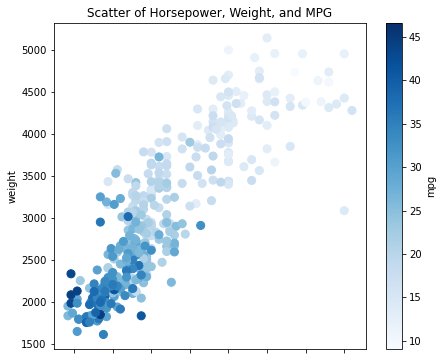

In [11]:
x='horsepower'
y='weight'
color_col='mpg'
title = 'Scatter of Horsepower, Weight, and MPG'

data.plot.scatter(
    x=x,
    y=y,
    c=color_col,
    s=65,
    colormap='Blues',
    xlabel=x,
    ylabel=y,
    title=title,
    figsize=(7,6)
)
plt.show()

However, the categorical color variable is more complicated with pandas due to how it interacts with categorical color mapping.

In this case, we need create a dictionary that maps categories to their specific colors. We can do that manually or automate from a color palette like below. Furthermore, the legend also needs to be manually constructed.

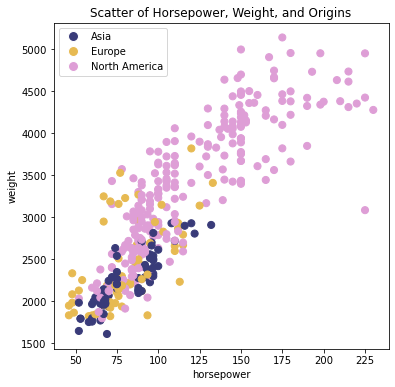

In [12]:
x='horsepower'
y='weight'
color_col='origin'
title = 'Scatter of Horsepower, Weight, and Origins'

#create category-color dictionary
cats = np.unique(data[color_col])
colors = plt.cm.tab20b(np.linspace(0, 1, len(cats)))
color_map = dict(zip(cats, colors))
#draw
fig,ax = plt.subplots()
data.plot.scatter(
    x=x,
    y=y,
    c=data[color_col].map(color_map),
    s=50,
    xlabel=x,
    ylabel=y,
    title=title,
    figsize=(6,6),
    ax=ax
)
#construct legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0],[0], marker='o', color='w', markerfacecolor=color_map[cat], 
                          label=cat, markersize=10)
                   for cat in color_map]
ax.legend(handles=legend_elements)
plt.show()

### In seaborn

Coloring by a third column is much easier in both seaborn. We just specify it with the `hue=` argument which takes both numeric and categorical data

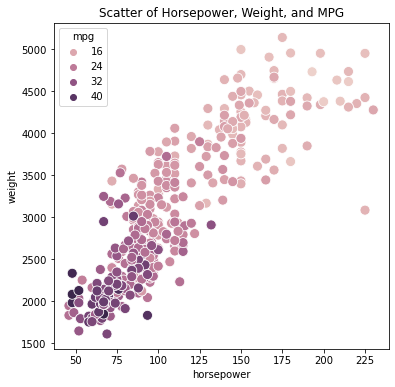

In [13]:
x='horsepower'
y='weight'
color_col='mpg'
title = 'Scatter of Horsepower, Weight, and MPG'
#scatter plot
plt.figure(figsize=(6,6))
sn.scatterplot(
    data,
    x=x,
    y=y,
    hue=color_col,
    s=100,
    marker='o',
)
plt.xlabel(x)
plt.ylabel(y)
plt.title(title)
#draw
plt.show()

categorical coloring results in discrete fills

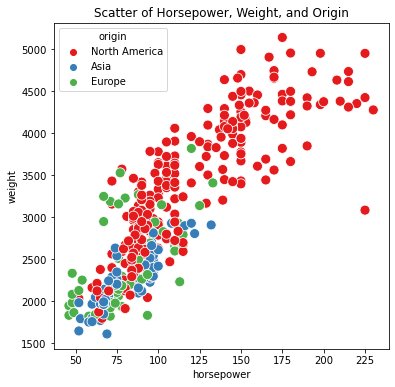

In [14]:
x='horsepower'
y='weight'
color_col='origin'
title = 'Scatter of Horsepower, Weight, and Origin'
#scatter plot
plt.figure(figsize=(6,6))
sn.scatterplot(
    data,
    x=x,
    y=y,
    hue=color_col,
    s=100,
    marker='o',
)
plt.xlabel(x)
plt.ylabel(y)
plt.title(title)
#draw
plt.show()

### Changing marker size

Besides colors, marker sizes can also be used to represent another dimension in our data. However, since sizes imply comparability, you should only use numeric or ordinal data here. 

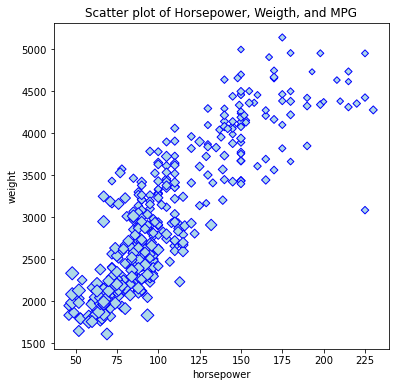

In [15]:
x = 'horsepower'
y = 'weight'
size_col = 'mpg'
title = 'Scatter plot of Horsepower, Weigth, and MPG'

#scatter
plt.figure(figsize=(6,6))
plt.scatter(
    data[x], 
    data[y],     
    s=data[size_col]*2,
    marker='D',         
    color='lightblue',
    linewidth=1,        
    edgecolor='blue'
)
plt.xlabel(x)
plt.ylabel(y)
plt.title(title)
#draw
plt.show()

However, if you want a legend for the marker sizes, it becomes a bit more complicated since we have to manually add the components

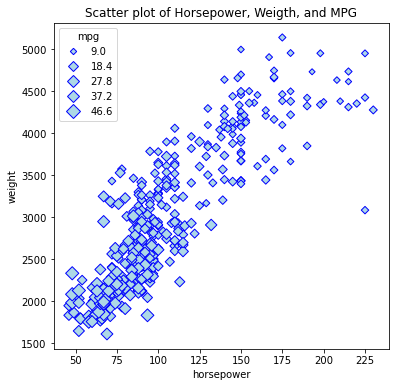

In [16]:
x = 'horsepower'
y = 'weight'
size_col = 'mpg'
title = 'Scatter plot of Horsepower, Weigth, and MPG'
facecolor = 'lightblue'
edgecolor = 'blue'

#scatter
plt.figure(figsize=(6,6))
plt.scatter(
    data[x], 
    data[y],     
    marker='D',         
    s=data[size_col]*2,               
    c=facecolor,
    linewidth=1,        
    edgecolor=edgecolor
)
#construct legends
legend_elements = [Line2D([0], [0], marker='D', color='w', label=s, 
                   markerfacecolor=facecolor, markeredgecolor=edgecolor,
                   markersize=np.sqrt(s)*1.5)
                   for s in np.linspace(data[size_col].min(),data[size_col].max(),5)]
plt.legend(handles=legend_elements, title=size_col)
#draw
plt.xlabel(x)
plt.ylabel(y)
plt.title(title)
plt.show()

### In pandas

Rather similar to matplotlib in that we need to manually build the legend. The size column is specified by `s=`

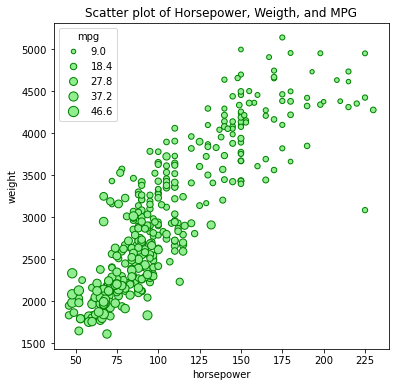

In [17]:
x = 'horsepower'
y = 'weight'
size_col = 'mpg'
title = 'Scatter plot of Horsepower, Weigth, and MPG'
facecolor = 'lightgreen'
edgecolor = 'green'

#scatter plot
data.plot.scatter(
    x=x,
    y=y,
    s=data[size_col]*2,
    c=facecolor,
    edgecolor=edgecolor,
    xlabel=x,
    ylabel=y,
    title=title,
    figsize=(6,6)
)
#construct legends
legend_elements = [Line2D([0], [0], marker='o', color='w', label=s, 
                   markerfacecolor=facecolor, markeredgecolor=edgecolor,
                   markersize=np.sqrt(s)*1.5)
                   for s in np.linspace(data[size_col].min(),data[size_col].max(),5)]
plt.legend(handles=legend_elements, title=size_col)
#draw
plt.show()

### In seaborn

Very similar to matplotlib. We just change the drawing function

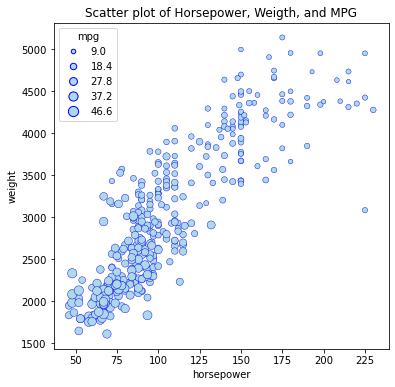

In [18]:
x = 'horsepower'
y = 'weight'
size_col = 'mpg'
title = 'Scatter plot of Horsepower, Weigth, and MPG'
facecolor = 'lightblue'
edgecolor = 'blue'

#scatter plot
plt.figure(figsize=(6,6))
sn.scatterplot(
    data,
    x='horsepower',
    y='weight',
    s=data[size_col]*2,
    marker='o',
    color=facecolor,
    edgecolor=edgecolor
)
#construct legends
legend_elements = [Line2D([0], [0], marker='o', color='w', label=s, 
                   markerfacecolor=facecolor, markeredgecolor=edgecolor,
                   markersize=np.sqrt(s)*1.5)
                   for s in np.linspace(data[size_col].min(),data[size_col].max(),5)]
plt.legend(handles=legend_elements, title=size_col)
#draw
plt.xlabel(x)
plt.ylabel(y)
plt.title(title)
plt.show()

### Changing marker styles

Marker styles refer to their shapes which can be utilzed to represent information as well. Unlike marker sizes, marker styles are discrete and therefore are usable only for categorical data. We won't be able to use pandas `scatter()` for this visualization.

#### In Matplotlib

Each call to `scatter()` in matplotlib can only draw a single types of markers. So, we need to write a loop to manually draw each class. I have not found a way to automate the selection of markers for each category, so we need to manually provide them.

Finally, without a color specified, matplotlib will fill each category differently. If you don't want that, you can set  `color=`

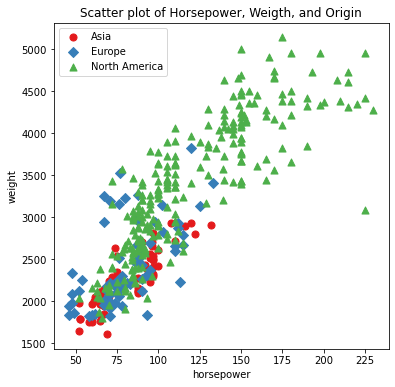

In [19]:
x = 'horsepower'
y = 'weight'
marker_col = 'origin'
markers = ['o','D','^']
title = 'Scatter plot of Horsepower, Weigth, and Origin'

plt.figure(figsize=(6,6))
for category, shape in zip(np.unique(data[marker_col]), markers):
    plt.scatter(
        data[x][data[marker_col]==category], 
        data[y][data[marker_col]==category],     
        marker=shape,         
        s=50,
        label=category,
    )
plt.legend()
plt.xlabel(x)
plt.ylabel(y)
plt.title(title)
plt.show()

### In seaborn

This plot is the easiest in seaborn. We can pass the marker shape through `style=`

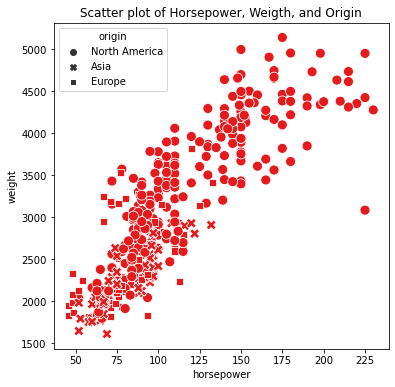

In [20]:
x = 'horsepower'
y = 'weight'
marker_col = 'origin'
title = 'Scatter plot of Horsepower, Weigth, and Origin'

plt.figure(figsize=(6,6))
sn.scatterplot(
    data,
    x=x,
    y=y,
    style=marker_col,
    s=100)
plt.xlabel(x)
plt.ylabel(y)
plt.title(title)
plt.show()

However, changing colors is more complicated if you want to set the colors in the legend since that must be done manually

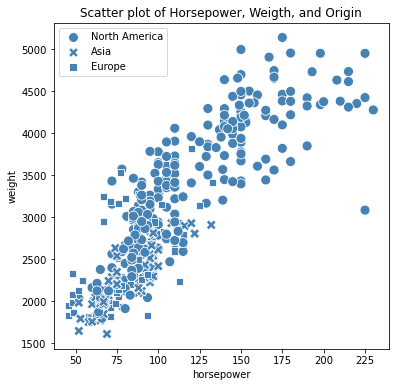

In [21]:
x = 'horsepower'
y = 'weight'
marker_col = 'origin'
title = 'Scatter plot of Horsepower, Weigth, and Origin'
color = 'steelblue'

fig, ax = plt.subplots(figsize=(6,6))
sn.scatterplot(
    data,
    x=x,
    y=y,
    style=data[marker_col],
    s=100,
    c=color,
    ax=ax
)
# Place the legend
lgd = ax.legend(
    loc="upper left", 
)
# Modify the point edge colour
for ha in ax.legend_.legend_handles:
    ha.set_facecolor(color)
    ha.set_edgecolor('w')
    ha.set_sizes([100])
plt.xlabel(x)
plt.ylabel(y)
plt.title(title)
plt.show()

### Combining multiple dimensions

Surely, we can combine colors, shapes, sizes to represent even more dimensions in our plots. However, due to the difficulty increase in matplotlib and/or pandas, we should just use seaborn in this case

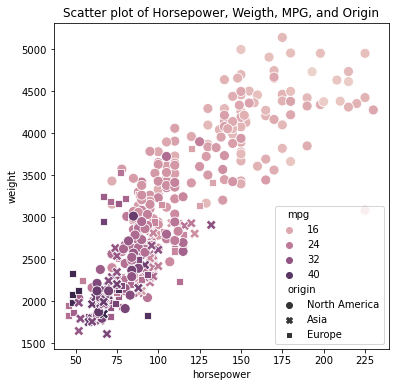

In [22]:
x = 'horsepower'
y = 'weight'
color_col = 'mpg'
marker_col = 'origin'
title = 'Scatter plot of Horsepower, Weigth, MPG, and Origin'

#scatter plot
fig, ax = plt.subplots(figsize=(6,6))
sn.scatterplot(
    data,
    x=x,
    y=y,
    hue=color_col,
    style=data[marker_col],
    ax=ax,
    s=100
)

plt.xlabel(x)
plt.ylabel(y)
plt.title(title)
plt.show()

Below is one example with everything together. However, carefully consider if you need this type of visualizations. As you can see, it is not that easy to read all the information

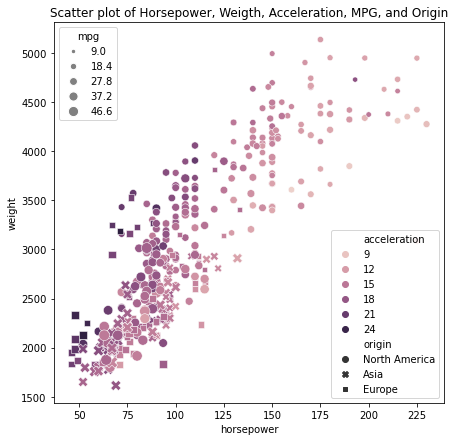

In [23]:
x = 'horsepower'
y = 'weight'
color_col = 'acceleration'
size_col = 'mpg'
marker_col = 'origin'
title = 'Scatter plot of Horsepower, Weigth, MPG, and Origin'



fig, ax = plt.subplots(figsize=(7,7))
sn.scatterplot(
    data,
    x=x,
    y=y,
    style=data[marker_col],
    hue=color_col,
    ax=ax,
    s=data[size_col]*3
)
#legend for color and shape
#construct legends for marker size
legend_elements = [Line2D([0], [0], marker='o', color='w', 
                          markerfacecolor='gray', label=s, markersize=np.sqrt(s)*1.5)
                   for s in np.linspace(data[size_col].min(),data[size_col].max(),5)]
legend_1 = plt.legend(handles=legend_elements, title=size_col)
legend_2 = ax.legend(loc="lower right")
plt.gca().add_artist(legend_1)
plt.xlabel(x)
plt.ylabel(y)
plt.title('Scatter plot of Horsepower, Weigth, Acceleration, MPG, and Origin')
plt.show()

## 3D Scatter plots

Another way of increasing the plot dimensionality is to utilize a 3-dimensional basis. We can only draw a 3D scatter plot using matplotlib.

For readability of 3d plots, I recommend set the notebook to interactive figure mode

In [24]:
%matplotlib notebook #change to interactive matplotlib figure mode

<IPython.core.display.Javascript object>


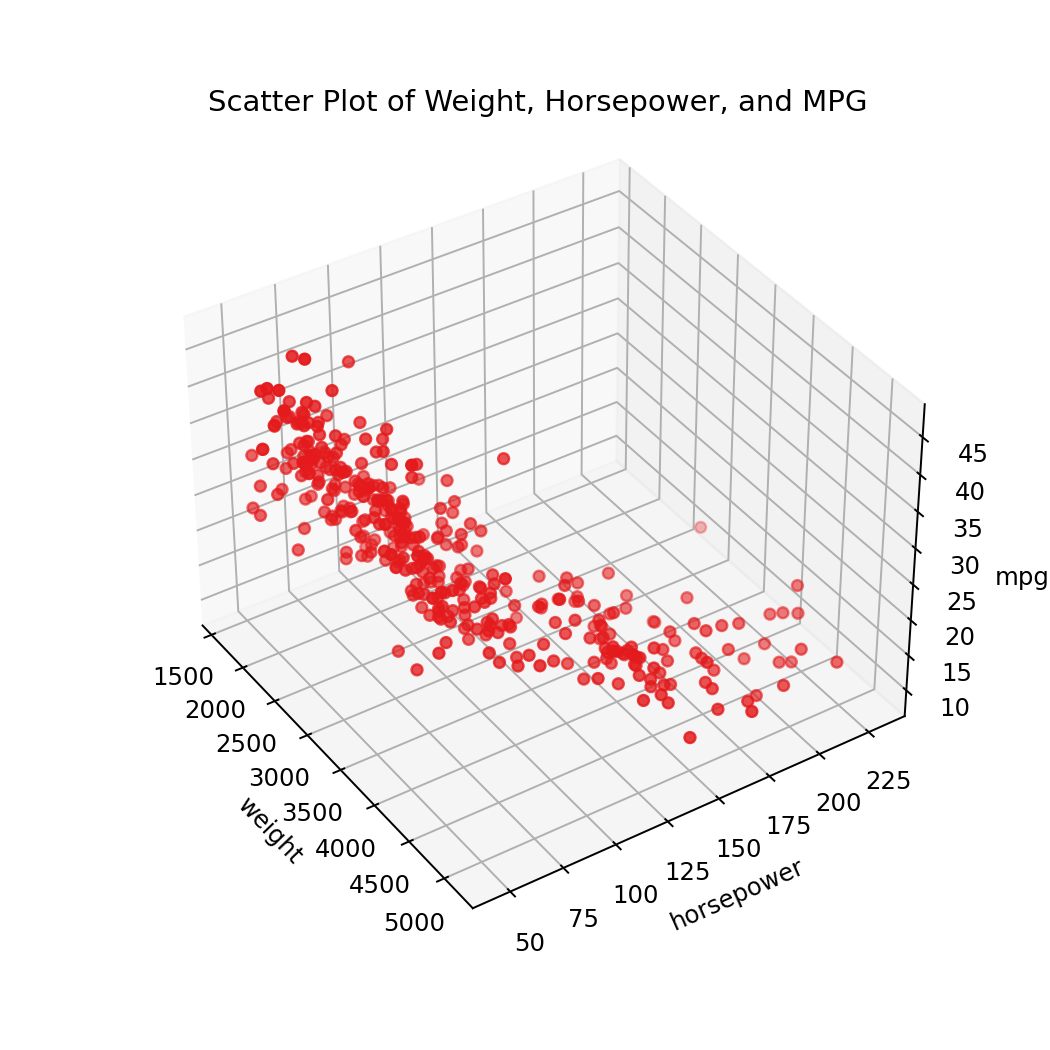

In [25]:
x = 'weight'
y = 'horsepower'
z = 'mpg'
title = 'Scatter Plot of Weight, Horsepower, and MPG'

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')
ax.scatter(data[x], data[y], data[z])
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)
plt.title(title)
plt.show()

### Adding size

<IPython.core.display.Javascript object>


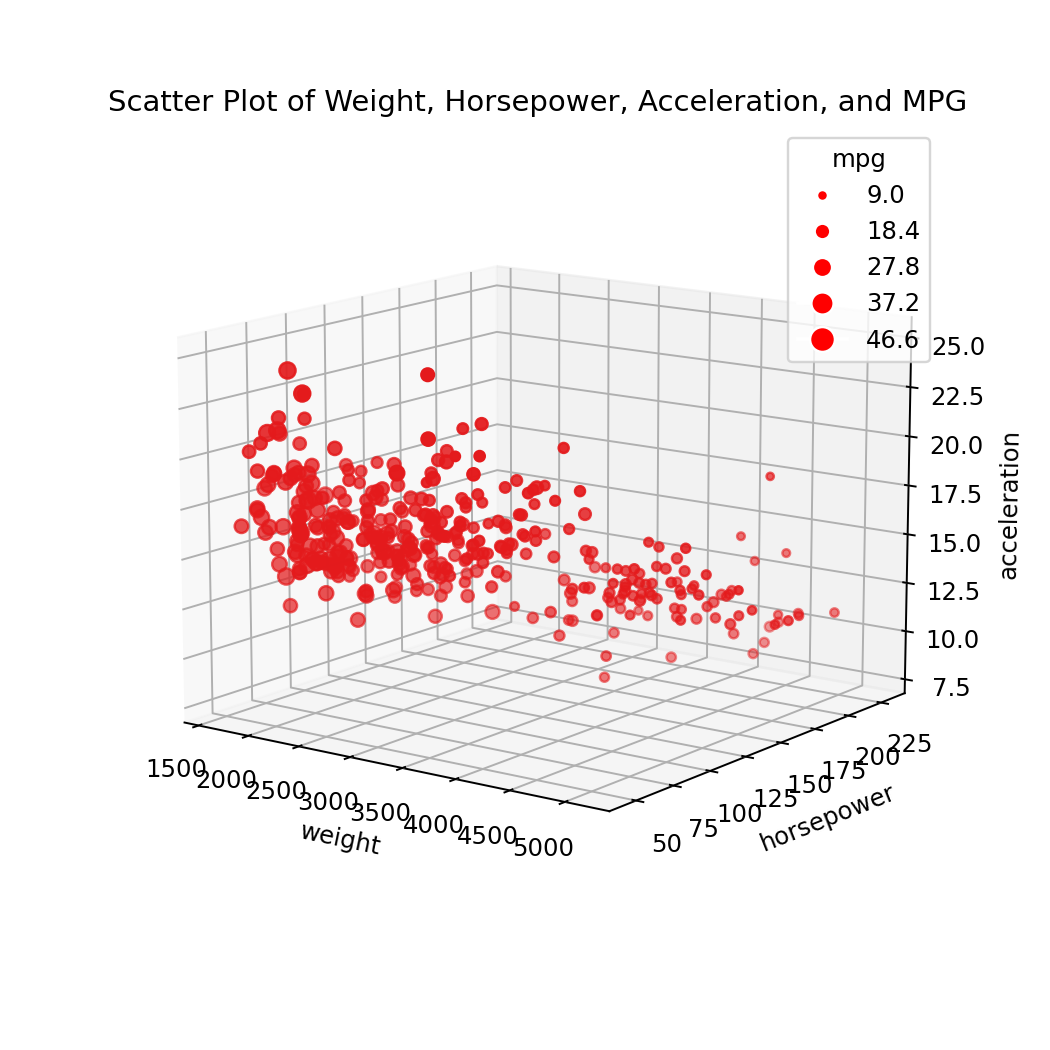

In [26]:
x = 'weight'
y = 'horsepower'
z = 'acceleration'
size_col = 'mpg'
title = 'Scatter Plot of Weight, Horsepower, Acceleration, and MPG'

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')
ax.scatter(data[x], data[y], data[z], s=data[size_col])
#construct legend for sizes
legend_elements = [Line2D([0], [0], marker='o', color='w', 
                          markerfacecolor='red', label=s, markersize=np.sqrt(s)*1.5)
                   for s in np.linspace(data['mpg'].min(),data['mpg'].max(),5)]
plt.legend(handles=legend_elements, title=size_col)
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)
plt.title(title)
plt.show()

### Adding colors

Similar to before, we use a loop to draw different categories in their specific colors

<IPython.core.display.Javascript object>


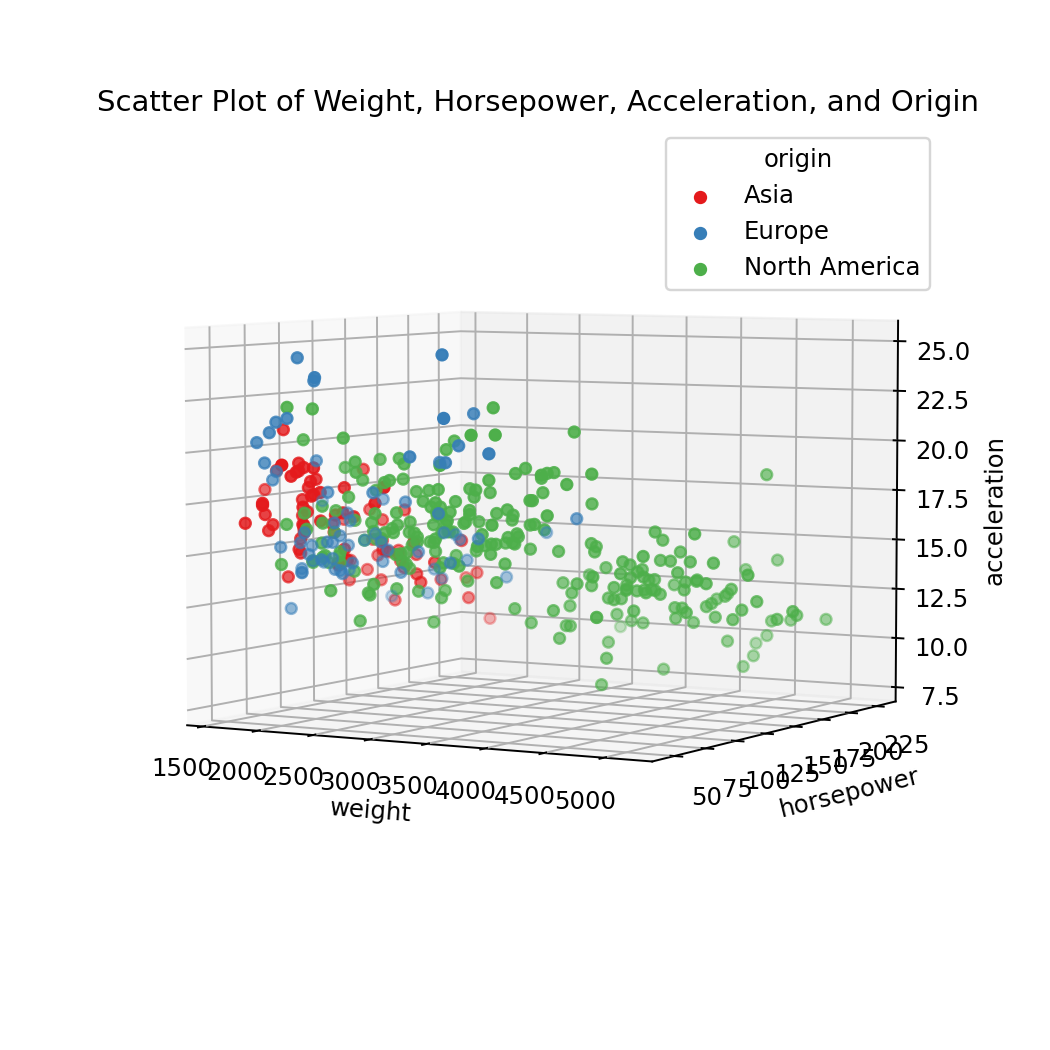

In [27]:
x = 'weight'
y = 'horsepower'
z = 'acceleration'
color_col = 'origin'
title = 'Scatter Plot of Weight, Horsepower, Acceleration, and Origin'


plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Set1.colors)
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')
for category in np.unique(data[color_col]):
    ax.scatter(
        data[x][data[color_col]==category], 
        data[y][data[color_col]==category], 
        data[z][data[color_col]==category],
        label=category
    )
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)
plt.legend(title=color_col)
plt.title(title)
plt.show()

### Adding marker size

<IPython.core.display.Javascript object>


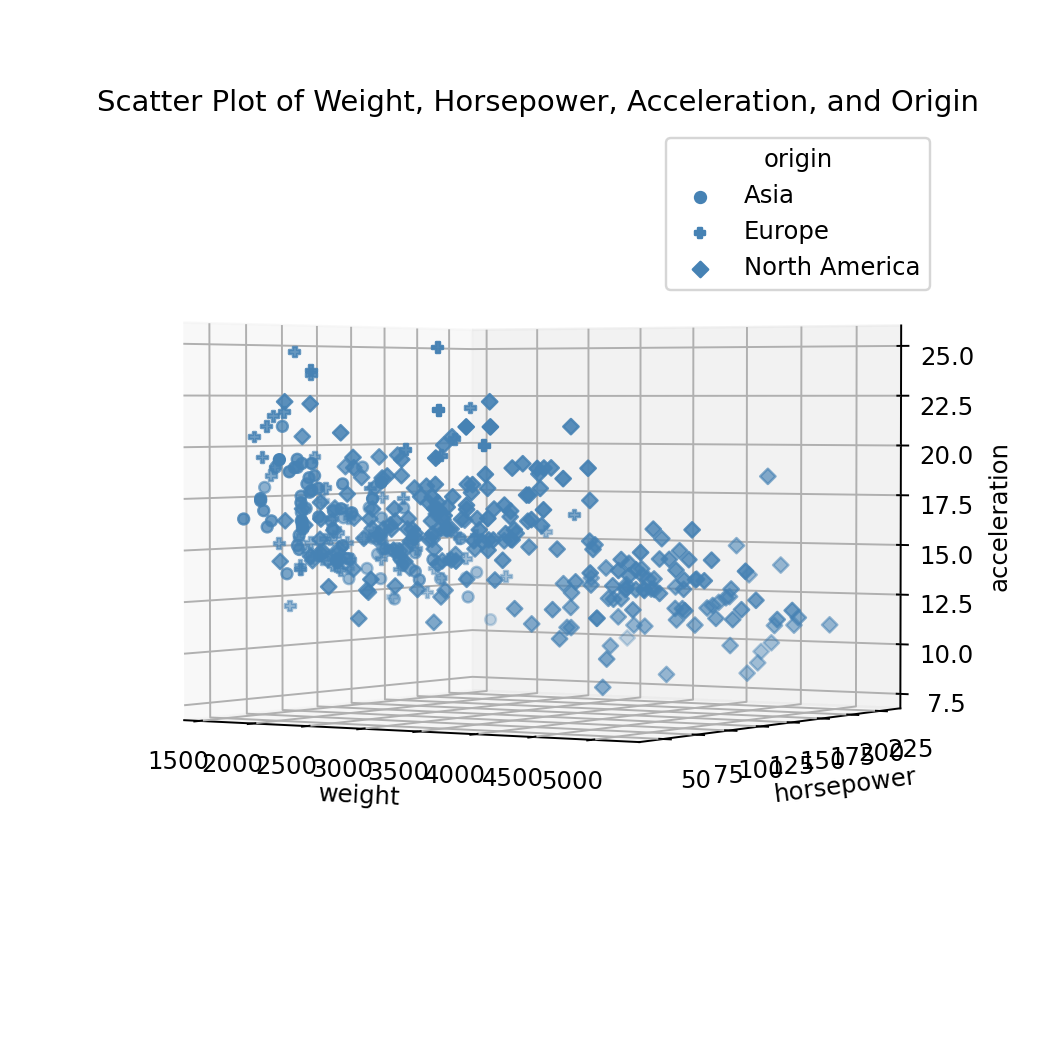

In [28]:
x = 'weight'
y = 'horsepower'
z = 'acceleration'
marker_col = 'origin'
markers = ['o','P','D']
title = 'Scatter Plot of Weight, Horsepower, Acceleration, and Origin'

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')
for category, shape in zip(np.unique(data[marker_col]),markers):
    ax.scatter(
        data[x][data[marker_col]==category], 
        data[y][data[marker_col]==category], 
        data[z][data[marker_col]==category],
        color='steelblue',
        marker=shape,
        label=category
    )
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)
plt.legend(title=marker_col)
plt.title(title)
plt.show()

### Everything together

I tried to put everything together and somewhat was successful. The plot below can visualize six different dimensions in data. The code become pretty complex though. So, use this with cautions and consider whether you really need all these components.

<IPython.core.display.Javascript object>


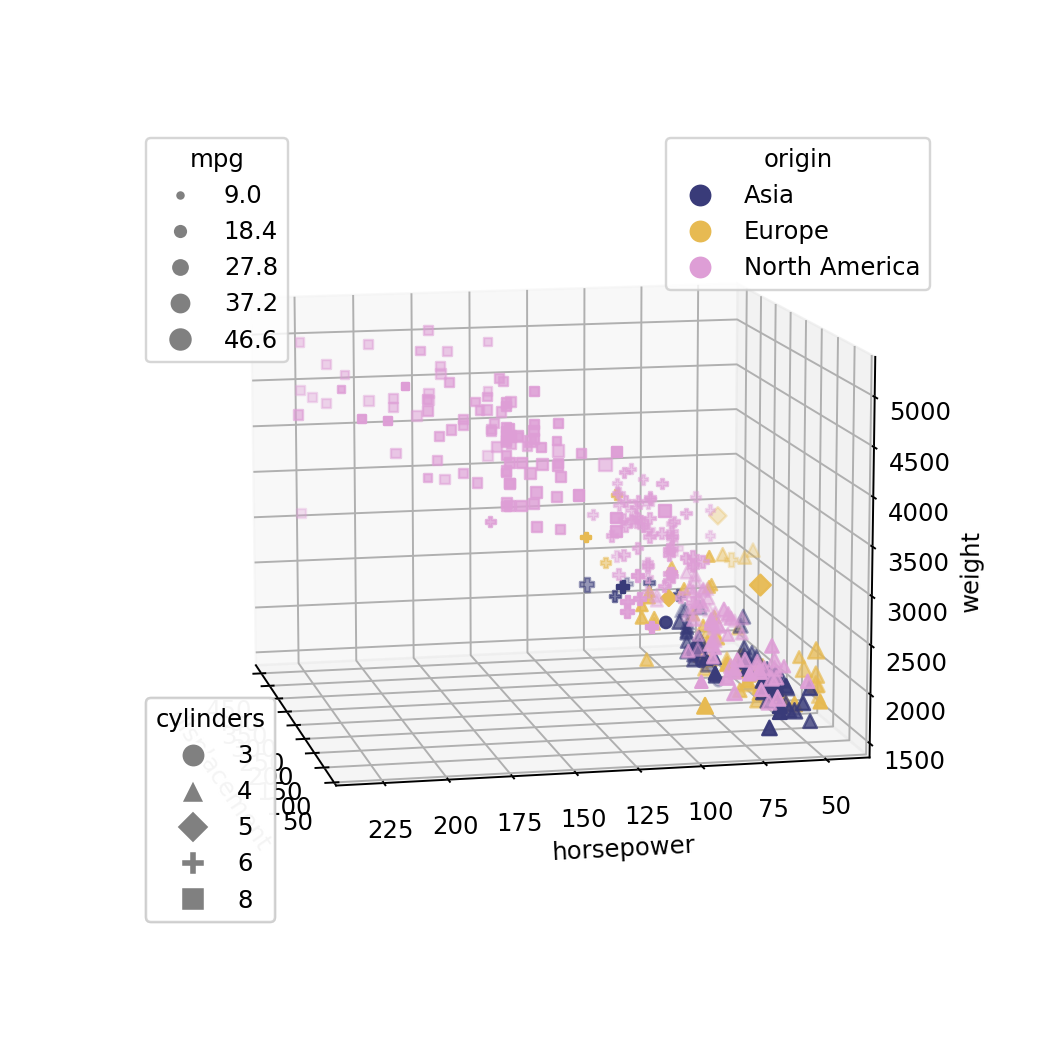

In [29]:
x = 'displacement'
y = 'horsepower'
z = 'weight'
size_col = 'mpg'
color_col = 'origin'
marker_col = 'cylinders'

#dictionaries for category-color and category-shape
colop_map = dict(zip(np.unique(data[color_col]),['red','green','blue']))
marker_map = dict(zip(np.unique(data[marker_col]),['o','^','D','P','s']))

#scatter
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')
#loop through each combination of color-marker
import itertools
for color_cat, marker_cat in itertools.product(np.unique(data['origin']),np.unique(data['cylinders'])):
    ax.scatter(
        data[x][(data[color_col]==color_cat) & (data[marker_col]==marker_cat)], 
        data[y][(data[color_col]==color_cat) & (data[marker_col]==marker_cat)], 
        data[z][(data[color_col]==color_cat) & (data[marker_col]==marker_cat)],
        s=data[size_col][(data[color_col]==color_cat) & (data[marker_col]==marker_cat)],
        color=color_map[color_cat],
        marker=marker_map[marker_cat]
    )
#add size legend 
size_elements = [Line2D([0], [0], 
                          marker='o', 
                          color='w', 
                          markerfacecolor='gray', 
                          label=s, 
                          markersize=np.sqrt(s)*1.5)
                   for s in np.linspace(data[size_col].min(),data[size_col].max(),5)]
legend_1 = plt.legend(handles=size_elements, title=size_col, loc='upper left')
#add color legend
color_elements = [Line2D([0], [0], 
                  marker='o', 
                  color='w', 
                  markerfacecolor=color_map[c], 
                  label=c, 
                  markersize=10)
                  for c in color_map]
legend_2 = plt.legend(handles=color_elements, title=color_col, loc='upper right')
#add marker legend
marker_elements = [Line2D([0], [0], 
                  marker=marker_map[m], 
                  color='w', 
                  markerfacecolor='gray', 
                  label=m, 
                  markersize=10)
                  for m in marker_map]
legend_3 = plt.legend(handles=marker_elements, title=marker_col, loc='lower left')

#draw
plt.gca().add_artist(legend_1)
plt.gca().add_artist(legend_2)
plt.gca().add_artist(legend_3)
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)
plt.show()